### Image Compression


In [6]:
import imageio

RGB = imageio.imread('peppers.png')


In [2]:
import numpy as np

L1 = np.sum(RGB, axis=2) / 3.0  # grayscale image
L2 = RGB[:,:,0] / 3.0 + RGB[:,:,1] / 3.0 - RGB[:,:,2] / 3.0
L3 = RGB[:,:,0] / 3.0 - RGB[:,:,1] / 3.0 + RGB[:,:,2] / 3.0
L4 = -RGB[:,:,0] / 3.0 + RGB[:,:,1] / 3.0 + RGB[:,:,2] / 3.0


In [3]:
from scipy.stats import entropy

H1 = entropy(L1.ravel())
H2 = entropy(L2.ravel())
H3 = entropy(L3.ravel())
H4 = entropy(L4.ravel())


In [4]:
Hmin = min(H1, H2, H3, H4)
Hmax = max(H1, H2, H3, H4)

if Hmin == H1:
    Lmin = L1
elif Hmin == H2:
    Lmin = L2
elif Hmin == H3:
    Lmin = L3
else:
    Lmin = L4

if Hmax == H1:
    Lmax = L1
elif Hmax == H2:
    Lmax = L2
elif Hmax == H3:
    Lmax = L3
else:
    Lmax = L4


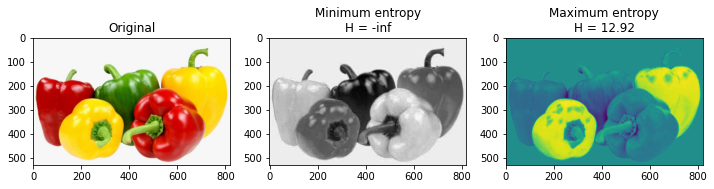

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(RGB)
axs[0].set_title('Original')
axs[1].imshow(Lmin, cmap='gray')
axs[1].set_title(f'Minimum entropy\nH = {Hmin:.2f}')
axs[2].imshow(Lmax)
axs[2].set_title(f'Maximum entropy\nH = {Hmax:.2f}')
plt.show()


In [7]:
import numpy as np

# Define the quantization step sizes
stepsizes = [10, 20]

# Define the range of values for the second and third components
ranges = [-stepsize for stepsize in stepsizes[::-1]] + [stepsize for stepsize in stepsizes]

# Initialize the list of all possible triples
triples = []

# Loop over all possible combinations of the three values
for x in ranges:
    for y in ranges:
        for z in ranges:
            if x != 0 or y != 0 or z != 0:  # exclude the trivial case (0, 0, 0)
                triples.append((x, y, z))

# Display the list of all possible triples
print(triples)


[(-20, -20, -20), (-20, -20, -10), (-20, -20, 10), (-20, -20, 20), (-20, -10, -20), (-20, -10, -10), (-20, -10, 10), (-20, -10, 20), (-20, 10, -20), (-20, 10, -10), (-20, 10, 10), (-20, 10, 20), (-20, 20, -20), (-20, 20, -10), (-20, 20, 10), (-20, 20, 20), (-10, -20, -20), (-10, -20, -10), (-10, -20, 10), (-10, -20, 20), (-10, -10, -20), (-10, -10, -10), (-10, -10, 10), (-10, -10, 20), (-10, 10, -20), (-10, 10, -10), (-10, 10, 10), (-10, 10, 20), (-10, 20, -20), (-10, 20, -10), (-10, 20, 10), (-10, 20, 20), (10, -20, -20), (10, -20, -10), (10, -20, 10), (10, -20, 20), (10, -10, -20), (10, -10, -10), (10, -10, 10), (10, -10, 20), (10, 10, -20), (10, 10, -10), (10, 10, 10), (10, 10, 20), (10, 20, -20), (10, 20, -10), (10, 20, 10), (10, 20, 20), (20, -20, -20), (20, -20, -10), (20, -20, 10), (20, -20, 20), (20, -10, -20), (20, -10, -10), (20, -10, 10), (20, -10, 20), (20, 10, -20), (20, 10, -10), (20, 10, 10), (20, 10, 20), (20, 20, -20), (20, 20, -10), (20, 20, 10), (20, 20, 20)]


<ipython-input-11-7972be5e80b8>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = img.astype(np.float)
<ipython-input-11-7972be5e80b8>:33: RuntimeWarning: invalid value encountered in divide
  hist = hist / np.sum(hist)  # normalize the histogram


Minimum estimated entropy = -0.000 for triple (-10, -20, 20)


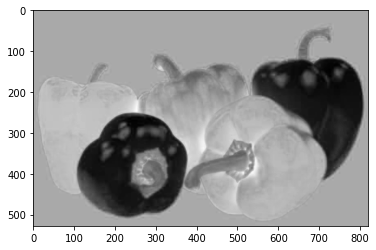

Maximum estimated entropy = 4.694 for triple (-20, 20, -10)


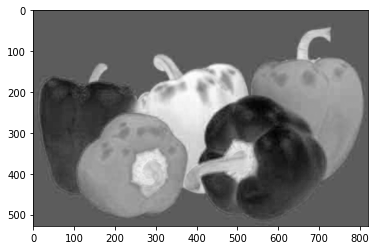

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
#img = plt.imread("peppers.png")
import imageio

img= imageio.imread('peppers.png')


# Convert the image to floating point format
img = img.astype(np.float)

# Define the quantization step sizes
stepsizes = [10, 20]

# Define the range of values for the second and third components
ranges = [-stepsize for stepsize in stepsizes[::-1]] + [stepsize for stepsize in stepsizes]

# Initialize variables to keep track of the minimum and maximum estimated entropy
min_entropy = np.inf
max_entropy = -np.inf

# Loop over all possible combinations of the three values
for x in ranges:
    for y in ranges:
        for z in ranges:
            if x != 0 or y != 0 or z != 0:  # exclude the trivial case (0, 0, 0)
                # Compute the linear combination of the RGB components
                pseudochrominance = x*img[:,:,0] + y*img[:,:,1] + z*img[:,:,2]
                # Compute the estimated entropy of the pseudochrominance channel
                hist, bins = np.histogram(pseudochrominance, bins=256, range=(0, 255))
                hist = hist / np.sum(hist)  # normalize the histogram
                entropy = -np.sum(hist * np.log2(hist + 1e-12))  # compute the entropy
                # Update the minimum and maximum entropy and corresponding pseudochrominance
                if entropy < min_entropy:
                    min_entropy = entropy
                    min_pseudochrominance = pseudochrominance
                    min_triple = (x, y, z)
                if entropy > max_entropy:
                    max_entropy = entropy
                    max_pseudoluminance = pseudochrominance
                    max_triple = (x, y, z)

# Display the minimum and maximum entropy and corresponding pseudochrominance
print(f"Minimum estimated entropy = {min_entropy:.3f} for triple {min_triple}")
plt.imshow(min_pseudochrominance, cmap='gray')
plt.show()

print(f"Maximum estimated entropy = {max_entropy:.3f} for triple {max_triple}")
plt.imshow(max_pseudoluminance, cmap='gray')
plt.show()
